## Unsupervised clustering for identifying spatial inhomogeneity on local electronic structures
Hideaki Iwasawa, Tetsuro Ueno, Takahiko Masui, Setsuko Tajima

Correspondence should be addressed to H.I. (iwasawa.hideaki@qst.go.jp)

# Part 1: Data Loading and pre-processing

- Module Setting 

In [1]:
from nexusformat.nexus import *
import numpy as np
import matplotlib.pyplot as plt
import time

- Memory Setting 

In [ ]:
# Depending on data size, loading a nexus file may cause a problem with the default setting of the memory limit (2000 MB).
# If you encounter the data loading problem, run the following command.
nxsetmemory(8000)
# Adjust the value (MB unit) in the blacket so as to avoid an error while running "nxload" 

## (1-i) Load Data

- Specify Data path
    - Select and run one of two below cells to specify target data

In [2]:
# Core mapping Data
path2file = './data/SPmap_Ba4d.nxs' 

In [ ]:
# Near-EF mapping Data
path2file = './data/SPmap_EF.nxs'

- Load data and initial settings on scaling
    - Mapping axes will be rescaled w.r.t. center of the image
    - Energy will be rescaled to Binding energy w.r.t. Fermi energy (ef)

In [3]:
t1 = time.time() 

alldata = nxload(path2file) # All data including metadata
mapdata = alldata.entry1.instrument.analyser.data # Spatial Mapping Data (4D)
eng_raw = alldata.entry1.analyser.energies[:].flatten() # Kinetic Energy
ang_raw = alldata.entry1.analyser.angles[:].flatten() # Angles
x_raw = alldata.entry1.analyser.sax[:].nxvalue # Sample X = Manipulator X
y_raw = alldata.entry1.analyser.saz[:].nxvalue # Sample Y = Manipulator Z

# Size
xn = np.shape(mapdata)[0] # Row // x-axis
yn = np.shape(mapdata)[1] # Column // y-axis
an = np.shape(mapdata)[2] # Lay // Angles
en = np.shape(mapdata)[3] # Chunk // Energies
pn = xn * yn

# X axis
x_ini = x_raw[0][0]
x_end = x_raw[xn-1][0]
xw = np.abs(x_end - x_ini) # Width
dx = x_raw[1][0] - x_raw[0][0] # Step

# Y axis
y_ini = y_raw[0][0]
y_end = y_raw[0][yn-1]
yw = np.abs(y_end - y_ini) # Width
dy = np.abs(y_raw[0][1] - y_raw[0][0]) # Step

k = 0
xpos = np.zeros(xn*yn)
ypos = np.zeros(xn*yn)
for i in range(xn):
    for j in range(yn):
        xpos[k] = -xw/2 + i*dx # curxpos
        ypos[k] = -yw/2 + j*dy # curypos
        k += 1
    
# Energy axis
ef = 144.68 # Fermi Energy
eng = - (eng_raw - ef) # Binding Energy
eng_ini = eng[0]
eng_end = eng[en-1]

# Angle axis
ang = ang_raw
ang_ini = ang[0]
ang_end = ang[an-1]

print("Load File:", path2file)
print("\r")
print("---Data Size---")
print("Map Axis 1 :", xn)
print("Map Axis 2 :", yn)
print("Angle :", an)
print("Energy :", en)
print("\r")

print("---Data Scaling---")
print("Map Axis 1 (width, step):", xw, dx)
print("Map Axis 2 (width, step):", yw, dy)
print("Angle (start, end):", ang_ini, ang_end)
print("Energy (start, end):", eng_ini, eng_end)
print("\r")

# For accessing data and variables for subsequent analyses
%store path2file

%store xn
%store yn
%store an
%store en
%store pn

%store xw
%store dx
%store yw
%store dy

%store eng
%store ang
%store xpos
%store ypos

print("\r")
t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

# If you want to confirm contents of a nexus file, run the following commands by removing the hash
#print("\r")
#print("---Contents of nexus file---")
#print(alldata.tree)

Load File: ./data/SPmap_Ba4d.nxs

---Data Size---
Map Axis 1 : 46
Map Axis 2 : 25
Angle : 1000
Energy : 1040

---Data Scaling---
Map Axis 1 (width, step): 2.25 0.04999999999999999
Map Axis 2 (width, step): 1.1999999999999886 0.049999999999954525
Angle (start, end): -23.943889285714288 23.943889285714288
Energy (start, end): 87.72209000000001 86.03891000000002

Stored 'path2file' (str)
Stored 'xn' (int)
Stored 'yn' (int)
Stored 'an' (int)
Stored 'en' (int)
Stored 'pn' (int)
Stored 'xw' (float64)
Stored 'dx' (float64)
Stored 'yw' (float64)
Stored 'dy' (float64)
Stored 'eng' (ndarray)
Stored 'ang' (ndarray)
Stored 'xpos' (ndarray)
Stored 'ypos' (ndarray)

Elapsed Time:  0.05784296989440918


## (1-ii) Spatial map of total ARPES intensity

D:\Program\anaconda3\lib\site-packages\nexusformat\nexus\tree.py:3612: RuntimeWarning: overflow encountered in long_scalars
  if (np.prod(self.shape) * np.dtype(self.dtype).itemsize


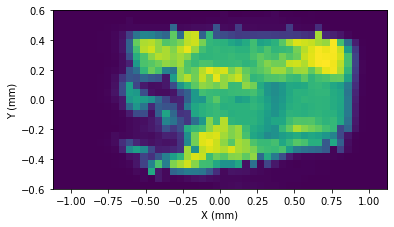

Elapsed Time:  6.8746137619018555


In [4]:
t1 = time.time() 

tot_map = np.sum(np.sum(mapdata.nxvalue, axis = 3), axis = 2)

# plot image
plt.imshow(tot_map.T, extent = [-xw/2, xw/2, -yw/2, yw/2], origin='lower')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.show()

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

## (1-iii) Flatten 4D map to 2D image

- iEDCs : Integrated EDCs

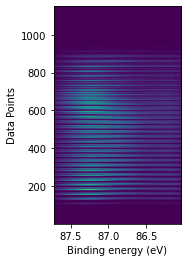

Stored 'iEDCs' (ndarray)
Elapsed Time:  0.47868943214416504


In [5]:
t1 = time.time() 

iEDCs = np.sum(mapdata.nxvalue, axis = 2).reshape(xn*yn, en) 

# plot image
plt.imshow(iEDCs, extent = [eng_ini, eng_end, 1, xn*yn], aspect = 0.0025)
plt.xlabel('Binding energy (eV)')
plt.ylabel('Data Points')
plt.show()

%store iEDCs

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

- iADCs : Integrated ADCs

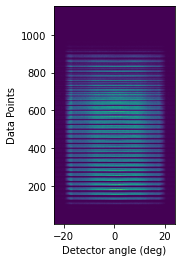

Stored 'iADCs' (ndarray)
Elapsed Time:  1.1310133934020996


In [6]:
t1 = time.time() 

iADCs = np.sum(mapdata.nxvalue, axis = 3).reshape(xn*yn, an) 

# plot image
plt.imshow(iADCs, extent = [ang_ini, ang_end, 1, xn*yn], aspect = 0.075)
plt.xlabel('Detector angle (deg)')
plt.ylabel('Data Points')
plt.show()

%store iADCs

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

## (1-iv) Output

- Save Directory

In [7]:
# default is to create "out" folder in the current directory, if not exist
import os
savedir = './out/'
if os.path.isdir(savedir) == False:
    os.mkdir(savedir)

- Spatial map of total ARPES intensity

In [8]:
np.savetxt(savedir+'spmap_ARPESint_total.txt', tot_map, delimiter='\t')

- iEDCs : Integrated EDCs

In [9]:
np.savetxt(savedir+'iEDCs.txt', iEDCs, delimiter='\t')

- iADCs : Integrated ADCs

In [10]:
np.savetxt(savedir+'iADCs.txt', iADCs, delimiter='\t')